In [28]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df =pd.read_csv('glassdoor_salary_data_cleaned.csv')
df.head(5)

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,sql,spark,aws,azure,google_cloud,scraping,api_development,machine_learning,deep_learning,statistics
0,Coffee Meets Bagel\nCoffee Meets Bagel's missi...,4.4,Coffee Meets Bagel\n,Toronto,"San Francisco, CA",51 to 200 employees,2012,Company - Private,Computer Hardware & Software,Information Technology,...,1,0,0,0,0,0,0,0,0,1
1,Wanted: A Data visualisation expert who will h...,5.0,Precision Nutrition\n,Toronto,"Toronto, Canada",51 to 200 employees,2001,Company - Private,Education Training Services,Education,...,1,0,0,0,0,0,0,0,0,0
2,About ApplyBoard\nApplyBoard is an online plat...,4.1,ApplyBoard\n,Kitchener,"Kitchener, Canada",501 to 1000 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,...,1,0,0,0,0,0,0,1,0,1
3,You will work in multi-disciplinary environmen...,4.4,McKinsey & Company\n,Montreal,"New York, NY",10000+ employees,1926,Company - Private,Consulting,Business Services,...,0,0,0,0,0,0,0,1,0,0
4,About Assurance\nAt Assurance we are disruptin...,3.4,Assurance Careers\n,Toronto,"Bellevue, WA",51 to 200 employees,2016,Company - Private,Insurance Agencies & Brokerages,Insurance,...,1,0,1,0,0,0,0,0,0,1


In [30]:
df['Location'] = df['Location'].replace(["Toronto, Ontario"],"Toronto")

In [31]:
# Get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Description       438 non-null    object 
 1   Rating                438 non-null    float64
 2   Company Name          438 non-null    object 
 3   Location              438 non-null    object 
 4   Headquarters          438 non-null    object 
 5   Size                  438 non-null    object 
 6   Founded               438 non-null    int64  
 7   Type of ownership     438 non-null    object 
 8   Industry              438 non-null    object 
 9   Sector                438 non-null    object 
 10  Revenue               438 non-null    object 
 11  Competitors           438 non-null    object 
 12  min_salary            438 non-null    int64  
 13  max_salary            438 non-null    int64  
 14  avg_salary            438 non-null    float64
 15  age_of_company        4

In [32]:
# Get Job- Descrption length to see if roles better described have any effect
df['job_description_len'] = df['Job Description'].apply(lambda x : len(x))

In [33]:
df['job_description_len'].head()

0    3599
1    8435
2    4599
3    4674
4    3731
Name: job_description_len, dtype: int64

In [34]:
# Get Competitors Count
df['num_comp'] = df['Competitors'].apply(lambda x : 0 if x =='-1' else len(x.split(','))) 


In [35]:
df['num_comp'].value_counts()

0    296
3    113
2     21
1      8
Name: num_comp, dtype: int64

In [36]:
# Cleaning Company
df['Company Name'] = df['Company Name'].apply((lambda x : x.replace('\n','')))
df['Company Name']

0       Coffee Meets Bagel
1      Precision Nutrition
2               ApplyBoard
3       McKinsey & Company
4        Assurance Careers
              ...         
433                  Nomis
434              Instacart
435    BMO Financial Group
436               Citibank
437           Global Relay
Name: Company Name, Length: 438, dtype: object

In [37]:
# Check the data ranges
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age_of_company,R,python,power_bi,tableau,...,aws,azure,google_cloud,scraping,api_development,machine_learning,deep_learning,statistics,job_description_len,num_comp
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,3.281507,1499.305936,71.552511,103.502283,87.527397,31.351598,0.105023,0.748858,0.127854,0.191781,...,0.180365,0.136986,0.082192,0.0,0.031963,0.447489,0.136986,0.351598,3907.305936,0.888128
std,1.642694,849.858261,24.475378,29.202579,25.994330,47.779572,0.306933,0.434166,0.334309,0.394152,...,0.384931,0.344226,0.274971,0.0,0.176104,0.497803,0.344226,0.478015,1833.626728,1.321810
min,-1.000000,-1.000000,34.000000,64.000000,49.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,394.000000,0.000000
25%,3.300000,1813.250000,54.000000,84.000000,71.500000,3.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2765.500000,0.000000
50%,3.750000,1990.000000,66.000000,100.000000,81.000000,14.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3648.000000,0.000000
75%,4.100000,2006.000000,87.000000,126.000000,101.000000,31.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,4582.500000,3.000000
max,5.000000,2018.000000,133.000000,171.000000,152.000000,208.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,12046.000000,3.000000


In [38]:
# Finding numeric data types
df.select_dtypes(include = ['int64','float64']).columns

Index(['Rating', 'Founded', 'min_salary', 'max_salary', 'avg_salary',
       'age_of_company', 'R', 'python', 'power_bi', 'tableau', 'ms_excel',
       'sql', 'spark', 'aws', 'azure', 'google_cloud', 'scraping',
       'api_development', 'machine_learning', 'deep_learning', 'statistics',
       'job_description_len', 'num_comp'],
      dtype='object')

In [39]:
# Finding object data types
df.select_dtypes(include = ['object']).columns

Index(['Job Description', 'Company Name', 'Location', 'Headquarters', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job_title_simplified', 'seniority'],
      dtype='object')

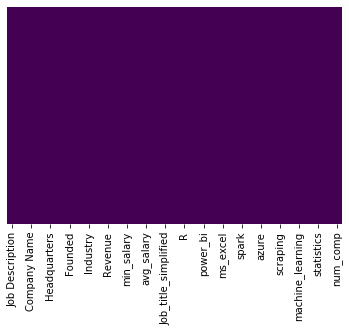

In [40]:
# Visualizing nulls using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As no nulls are present, null treatment is not required

In [41]:
df.shape

(438, 35)

In [42]:
# Find unique values in dataframe for each column
for i in df.columns :
    print(i + "\t" + str(len(df[i].unique())))

Job Description	384
Rating	32
Company Name	285
Location	51
Headquarters	117
Size	9
Founded	77
Type of ownership	12
Industry	59
Sector	25
Revenue	13
Competitors	75
min_salary	22
max_salary	22
avg_salary	24
age_of_company	77
Job_title_simplified	4
seniority	3
R	2
python	2
power_bi	2
tableau	2
ms_excel	2
sql	2
spark	2
aws	2
azure	2
google_cloud	2
scraping	1
api_development	2
machine_learning	2
deep_learning	2
statistics	2
job_description_len	370
num_comp	4


In [43]:
# find unique values of each column except Job Description
df1 = df.loc[:, df.columns != 'Job Description']
for i in df1.columns :
    print ( "Unique value of : >>> {} ({}) \n{} \n".format(i,len(df1[i].unique()),df1[i].unique()))

Unique value of : >>> Rating (32) 
[ 4.4  5.   4.1  3.4  4.3  3.5  2.7  4.   3.3  3.6  2.6  3.9  4.5  4.7
 -1.   4.9  4.2  3.1  4.6  3.7  4.8  3.8  1.9  1.8  2.3  3.2  2.8  3.
  2.5  2.9  2.4  1. ] 

Unique value of : >>> Company Name (285) 
['Coffee Meets Bagel' 'Precision Nutrition' 'ApplyBoard'
 'McKinsey & Company' 'Assurance Careers' 'Ecoation' 'People.ai' 'INVISTA'
 'MobSquad' 'Guavus' 'Suncor Energy Services' 'Geotab' 'Fujitsu'
 'Prodigy Game' 'Google' 'Bell Canada' 'Aquatic Informatics'
 'Canadian Security Intelligence Service' 'Clipwire Games' 'Ingrooves'
 'Amazon' 'Cerebri AI' 'Zesty.ai' 'Eagle Professional Resources'
 'Replicon' 'Oracle' 'Brain Finance' 'Mila' 'NDAX INC' 'Atlantic Lottery'
 'QuantumBlack' 'Camfil Power Systems' 'TEEMA' 'SNC-Lavalin'
 'Services Conseils IntelliS' 'J.D. Irving' 'Nylas' 'LotusFlare, Inc.'
 'autoTrader.ca' 'Aviva' 'NorthOne' 'Data Sciences Inc.' 'SkipTheDishes'
 'Save-On-Foods' 'SurveyMonkey' 'GradTests (gradtests.c' 'Purolator'
 'Tundra' 'IQVIA

In [44]:
# Describe the target
df['avg_salary'].describe()

count    438.000000
mean      87.527397
std       25.994330
min       49.000000
25%       71.500000
50%       81.000000
75%      101.000000
max      152.000000
Name: avg_salary, dtype: float64

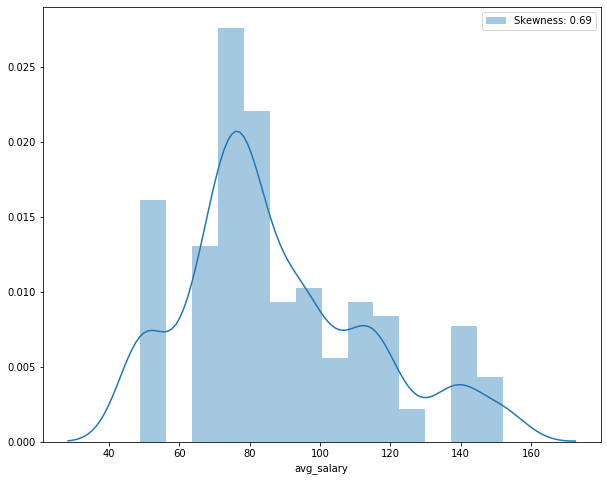

In [52]:
# Plot the distplot of target
plt.figure(figsize = (10,8))
bar = sns.distplot(df['avg_salary'])
bar.legend(["Skewness: {:.2f}".format(df['avg_salary'].skew())]);

As min and max salary are related to avergae salary, we will need to reove these columns to check collinearity

In [46]:
df.drop(columns = ['min_salary','max_salary'], inplace = True)

(21.5, -0.5)

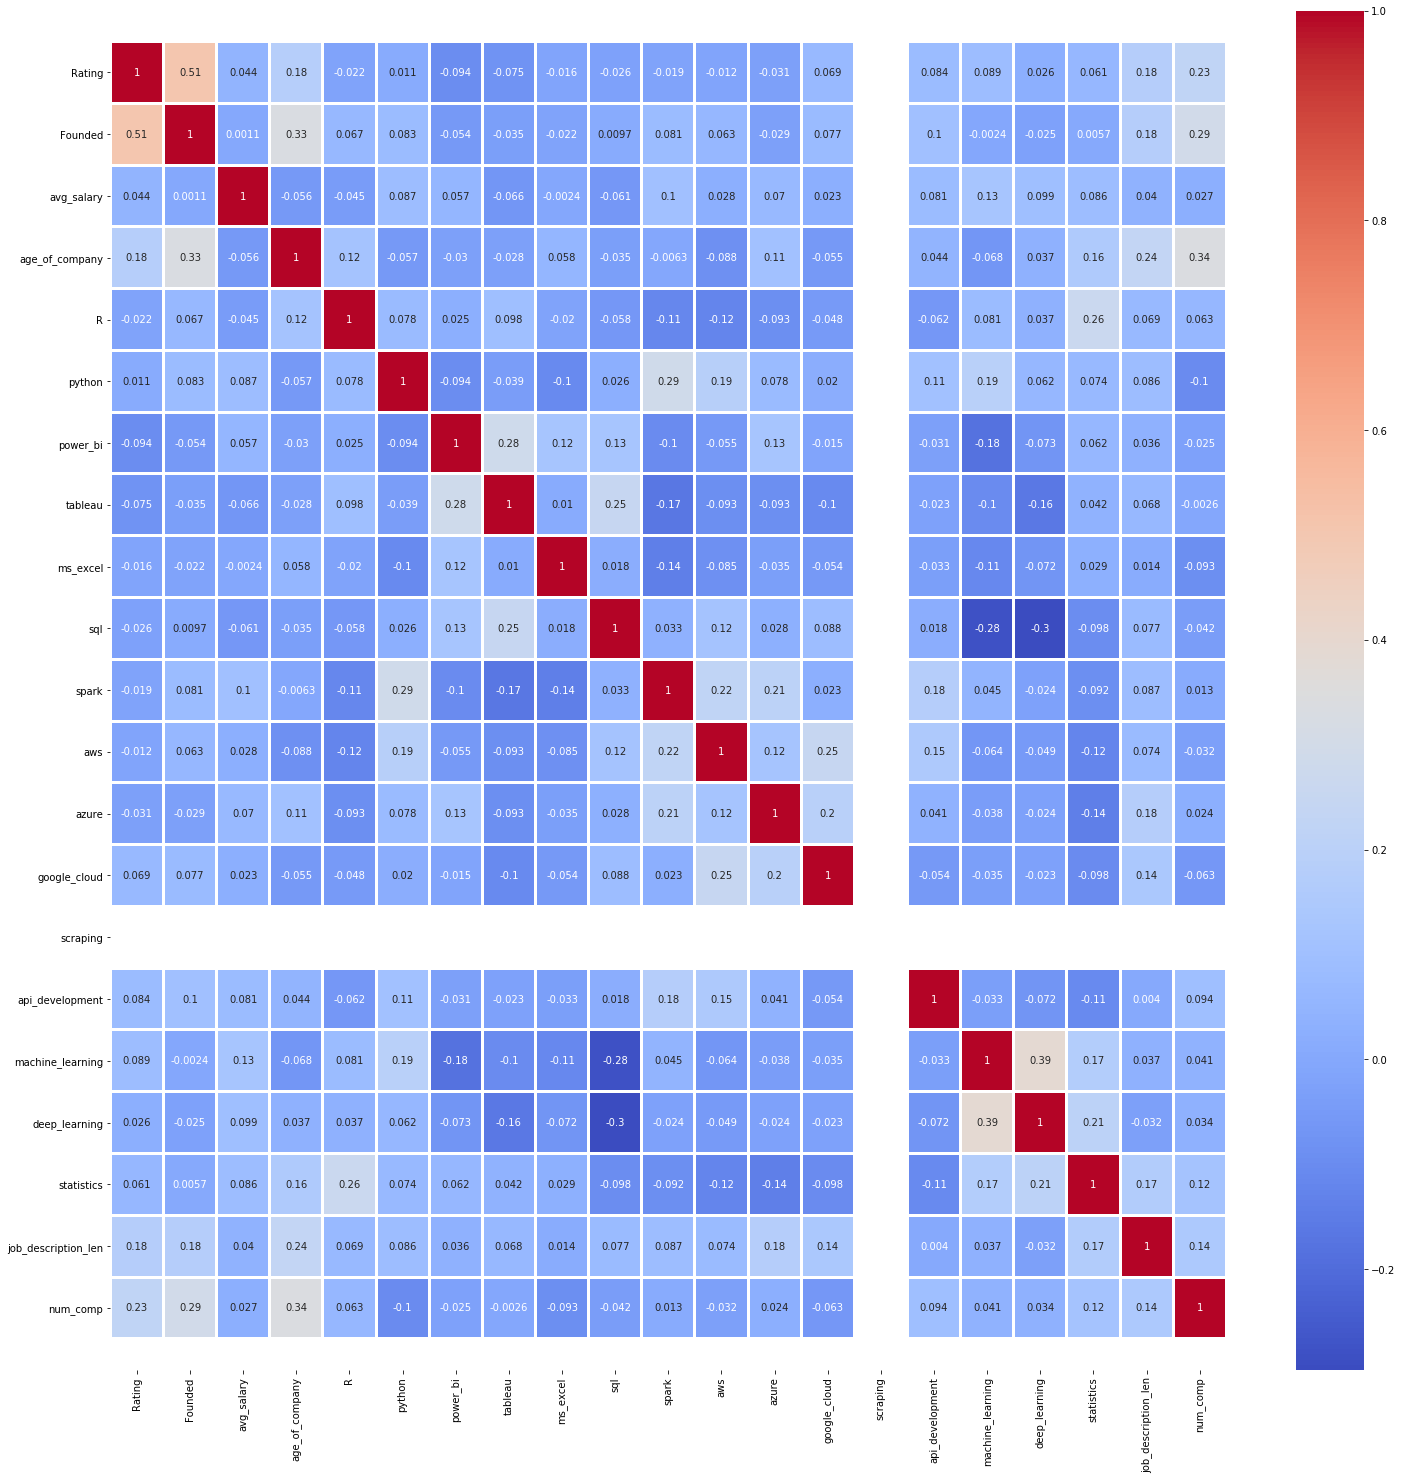

In [62]:
# correlation heatmap
plt.figure(figsize = (25,25))
ax = sns.heatmap(df.corr(),cmap = "coolwarm", annot=True, linewidth=2)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Show skewness of feature with distplot

In [63]:
df.columns

Index(['Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'avg_salary', 'age_of_company', 'Job_title_simplified',
       'seniority', 'R', 'python', 'power_bi', 'tableau', 'ms_excel', 'sql',
       'spark', 'aws', 'azure', 'google_cloud', 'scraping', 'api_development',
       'machine_learning', 'deep_learning', 'statistics',
       'job_description_len', 'num_comp'],
      dtype='object')

In [ ]:
df_back = df

In [ ]:
df[['age_of_company','avg_salary','Rating','job_description_len']].corr()

In [ ]:
df.columns

In [ ]:
df_cat = df[['Location','Company Name','num_comp','Size','Type of ownership','Industry']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Analyzing Salary Data by Job Title and Seniority

In [65]:
pd.pivot_table(df, index = ['Job_title_simplified', 'seniority'], values = 'avg_salary')

avg_salary
Job_title_simplified      seniority            
data analyst              junior      64.833333
                          na          79.638554
                          senior      83.652174
data engineer             junior      66.500000
                          na          80.831776
                          senior      84.096154
data scientist            na         110.474684
                          senior      90.090909
machine learning engineer na          81.894737
                          senior      89.562500

In [66]:
pd.set_option('display.max_rows', 100)
pd.pivot_table(df, index = ['Location','Job_title_simplified'], values = 'avg_salary',aggfunc = ['count','mean','median']).sort_values('Location', ascending = False)

count        mean     median
                                           avg_salary  avg_salary avg_salary
Location         Job_title_simplified                                       
Woodbridge       data scientist                     2   73.750000      73.75
                 data engineer                      1   73.500000      73.50
Winnipeg         data scientist                     3   93.333333      74.50
                 data engineer                      6   85.666667      85.75
                 data analyst                       2   70.750000      70.75
Welwyn           data scientist                     4   89.250000      92.75
Waterloo         data scientist                     2  125.250000     125.25
                 data engineer                      1   74.500000      74.50
                 data analyst                       2   65.250000      65.25
Victoria         data scientist                     3   84.833333      79.00
                 data analyst                       3   81.333333      81.50
Verdun           data analyst                       1  117.000000     117.00
Vancouver        machine learning engineer         12   86.791667      90.00
                 data scientist                    18   93.166667      85.75
                 data engineer                     32   79.843750      75.50
                 data analyst                      13   78.000000      81.00
Toronto          machine learning engineer         16   82.656250      79.00
                 data scientist                    34  105.250000     111.50
                 data engineer                     57   82.263158      79.00
                 data analyst                      28   81.875000      79.00
Surrey           data analyst                       1  152.000000     152.00
St. Jacobs       machine learning engineer          1   74.500000      74.50
Sault Ste. Marie data analyst                       1   49.000000      49.00
Saskatoon        data engineer                      1   64.000000      64.00
                 data analyst                       1   49.000000      49.00
                 data scientist                     1   66.500000      66.50
Saint-Hubert     data analyst                       1  101.000000     101.00
Saint John       data analyst                       1   49.000000      49.00
Richmond Hill    machine learning engineer          2   65.250000      65.25
Richmond         data analyst                       1  152.000000     152.00
Remote           data engineer                      1   81.500000      81.50
                 data analyst                       1   49.000000      49.00
Regina           data analyst                       1   66.500000      66.50
Quebec           data scientist                     1  117.000000     117.00
Ottawa           data engineer                      7   76.714286      79.00
                 data analyst                       4   79.625000      80.00
                 machine learning engineer          3   89.166667      90.00
                 data scientist                     8  122.187500     128.00
Oshawa           data analyst                       1   51.500000      51.50
Ontario          data scientist                     1   96.000000      96.00
Oakville         data scientist                     1  111.500000     111.50
North York       data scientist                     1  139.000000     139.00
                 data analyst                       1   51.500000      51.50
North Vancouver  data engineer                      1   73.500000      73.50
Nisku            data analyst                       1   71.500000      71.50
Newmarket        data engineer                      1   71.500000      71.50
New Westminster  data analyst                       1   75.500000      75.50
Montreal         machine learning engineer          4   88.750000      86.00
                 data scientist                    18  107.250000     114.25
                 data engineer              

In [69]:
# Focusing On Data Scientist Roles only
pd.pivot_table(df[df.Job_title_simplified =='data scientist'], index = ['Location','Job_title_simplified'],values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
Location,Job_title_simplified,
Dieppe,data scientist,139.000000
Langley,data scientist,139.000000
Laval,data scientist,139.000000
North York,data scientist,139.000000
Mississauga,data scientist,128.000000
Waterloo,data scientist,125.250000
Ottawa,data scientist,122.187500
Burnaby,data scientist,117.000000
Quebec,data scientist,117.000000


In [75]:
pd.pivot_table(df, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (CAD),3.0,12.0
$1 to $5 million (CAD),2.0,8.0
$10 to $25 million (CAD),4.0,10.0
$10+ billion (CAD),21.0,48.0
$100 to $500 million (CAD),7.0,40.0
$2 to $5 billion (CAD),10.0,23.0
$25 to $50 million (CAD),1.0,3.0
$5 to $10 billion (CAD),1.0,1.0
$5 to $10 million (CAD),NaN,1.0


In [76]:
df.to_csv('eda_data.csv')